In the training dataset we want to investigate how signup_app, first_device_type, first_browser effect country_destination and if possible groupings would help, if so we could create new features to improve the models accuracy.

In [57]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import calendar

sns.set_theme(style="whitegrid")

In [58]:
train_users_df = pd.read_csv("../data/raw/train_users_2.csv")
train_users_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [59]:
train_users_df.replace('-unknown-',np.nan, inplace=True)
train_users_df.replace('NaN',np.nan, inplace=True)

In [103]:
# Andrea's function
def calculate_percentage(demographic_value,values_on):
    fig, ax = plt.subplots()
    fig.set_size_inches(23,8)
    fig.tight_layout(pad=5.0)

    demographic_series = (train_users_df[demographic_value].value_counts() / train_users_df[demographic_value].count()) * 100
    sns.barplot(x=demographic_series.index,y=demographic_series,palette="Set2",ax=ax)
    sns.despine()
    title = demographic_value + " distribution"
    ax.set_title(title,pad=10.0,fontdict={'fontsize':15})
    ax.set_xlabel(demographic_value,weight='bold',size=12,labelpad=10)
    ax.set_ylabel("Total percentage",weight='bold',size=12,labelpad=10)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.tick_params(axis="both", which="both", bottom="off", top="off",labelbottom="on", left="off", right="off", labelleft="on")

    if values_on:
        for i in demographic_series.index:
            ax.text(demographic_series.index.get_loc(i), demographic_series[i], round(demographic_series[i],2), color='black', ha="center")

In [61]:
columns_of_interest = ["signup_app", "first_device_type", "first_browser"]

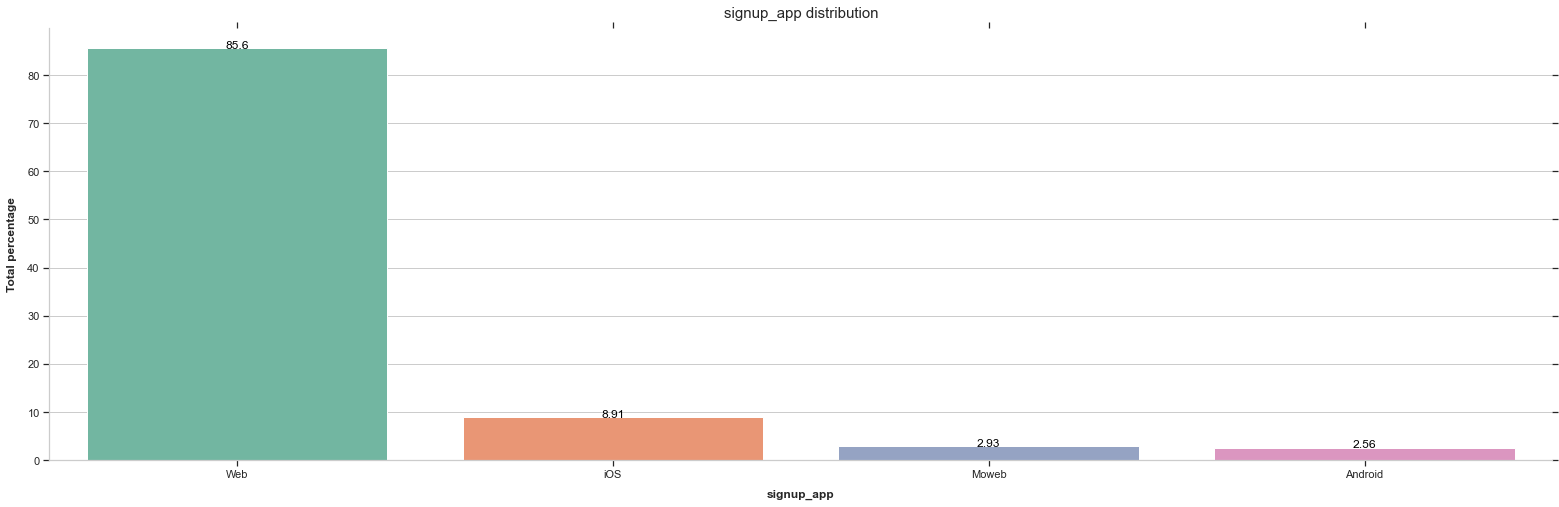

In [62]:
calculate_percentage(columns_of_interest[0],True)

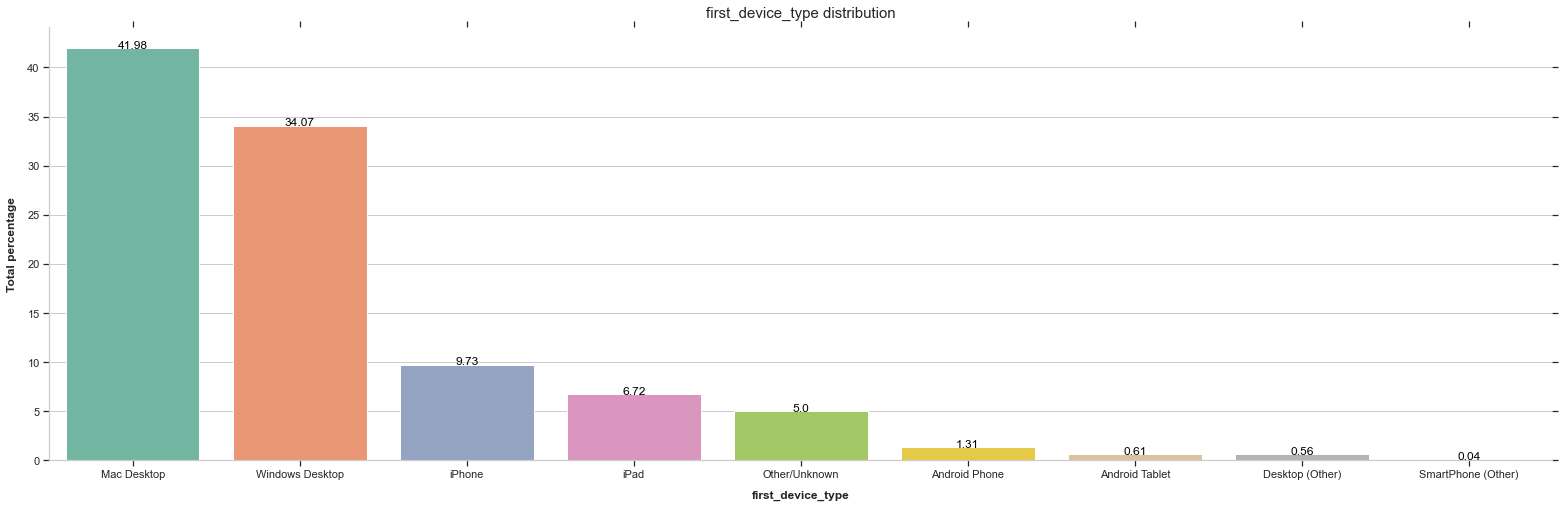

In [63]:
calculate_percentage(columns_of_interest[1],True)

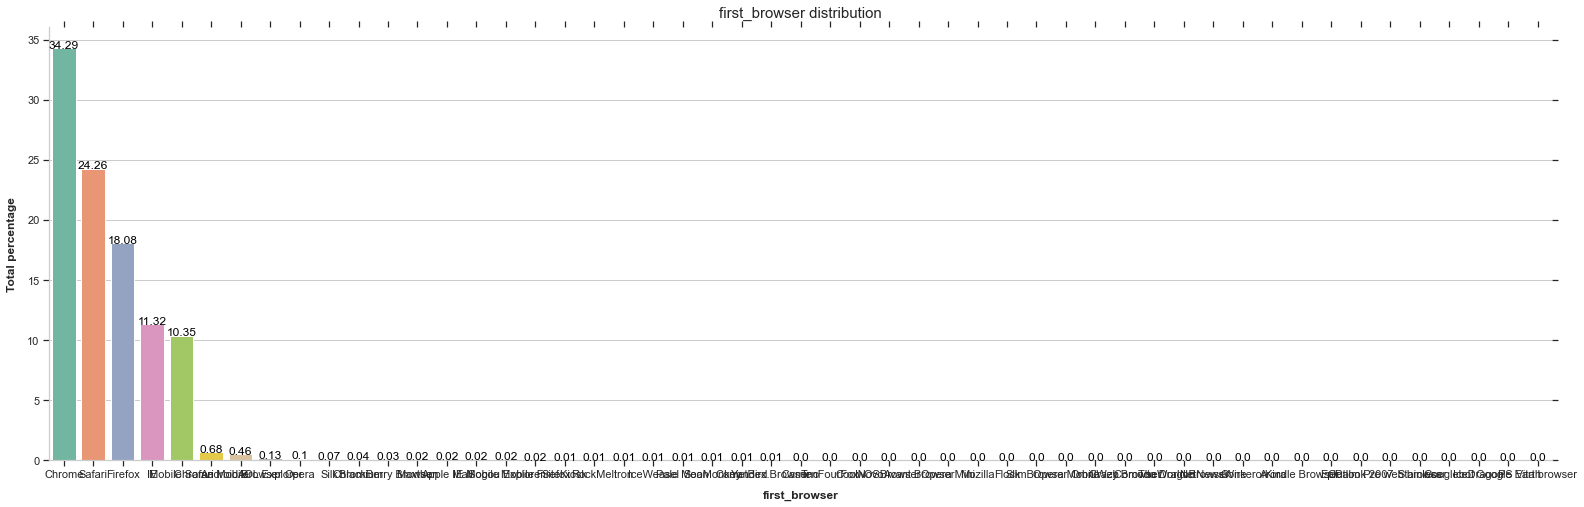

In [64]:
calculate_percentage(columns_of_interest[2],True)

We most likely should map the less frequeny browsers to an "Other" class, otherwise we will have extreme overfitting on the browsers where the is only one usedr with that browser. We will start with this than move onto bivariate investigation.

In [65]:
browser_map = {}
browser_percents = (train_users_df["first_browser"].value_counts() / train_users_df["first_browser"].count()) * 100
for browser, percent in browser_percents.items():
    if percent > 0.5:
        browser_map[browser] = browser
    else:
        browser_map[browser] = "Other"
print(browser_map)

{'Chrome': 'Chrome', 'Safari': 'Safari', 'Firefox': 'Firefox', 'IE': 'IE', 'Mobile Safari': 'Mobile Safari', 'Chrome Mobile': 'Chrome Mobile', 'Android Browser': 'Other', 'AOL Explorer': 'Other', 'Opera': 'Other', 'Silk': 'Other', 'Chromium': 'Other', 'BlackBerry Browser': 'Other', 'Maxthon': 'Other', 'Apple Mail': 'Other', 'IE Mobile': 'Other', 'Sogou Explorer': 'Other', 'Mobile Firefox': 'Other', 'SiteKiosk': 'Other', 'RockMelt': 'Other', 'Iron': 'Other', 'IceWeasel': 'Other', 'Pale Moon': 'Other', 'SeaMonkey': 'Other', 'CometBird': 'Other', 'Yandex.Browser': 'Other', 'Camino': 'Other', 'TenFourFox': 'Other', 'CoolNovo': 'Other', 'wOSBrowser': 'Other', 'Avant Browser': 'Other', 'Opera Mini': 'Other', 'Mozilla': 'Other', 'Flock': 'Other', 'SlimBrowser': 'Other', 'Opera Mobile': 'Other', 'OmniWeb': 'Other', 'Crazy Browser': 'Other', 'Comodo Dragon': 'Other', 'TheWorld Browser': 'Other', 'NetNewsWire': 'Other', 'Conkeror': 'Other', 'Arora': 'Other', 'Kindle Browser': 'Other', 'Epic': 'O

In [66]:
train_users_df["first_browser_map"] = train_users_df["first_browser"].map(browser_map)

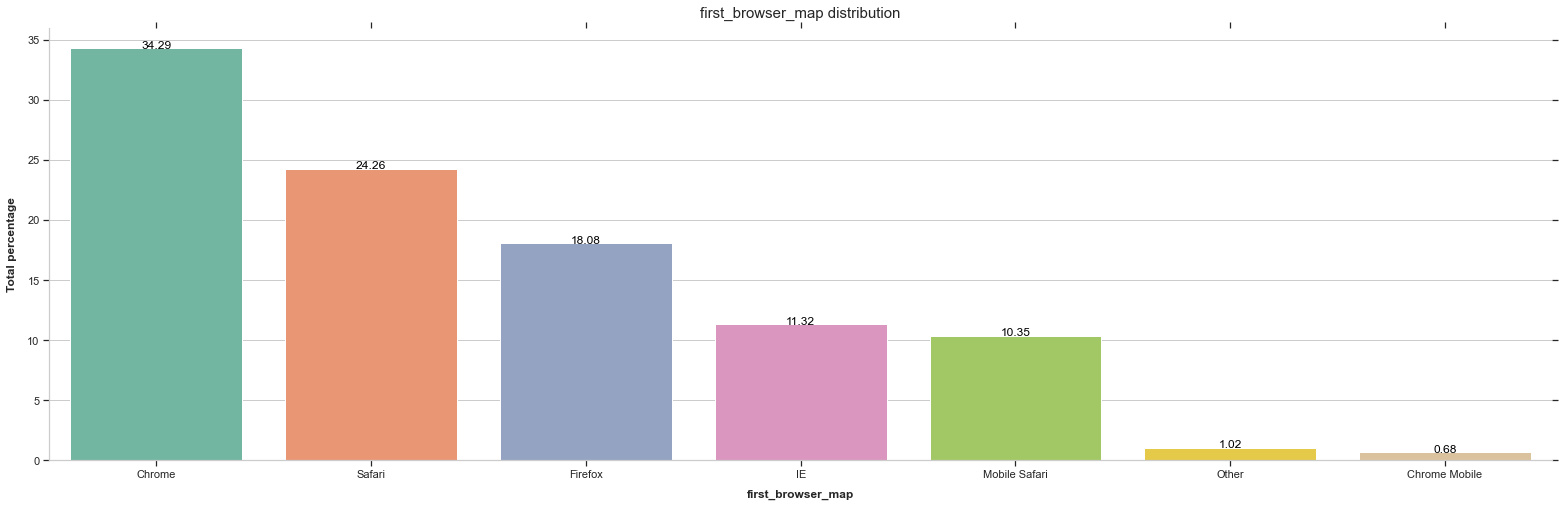

In [67]:
calculate_percentage("first_browser_map",True)

We have a good start but there are many versions of browsers that are just mobile versions of other browsers, such as "Mobile Safari" and "Chrome Mobile" which we should really cast to "Safari" and "Chrome" respectively. 

In [82]:
browser_map['Mozilla'] = "Firefox"

for browser, mapping in browser_map.items():
    split = browser.split(" ")
    if "Mobile" in split:
        split.remove("Mobile")
        browser_map[browser] = "".join(split)

browser_map["Opera Mobile"] = "Other"

In [83]:
train_users_df["first_browser_map_2"] = train_users_df["first_browser"].map(browser_map)

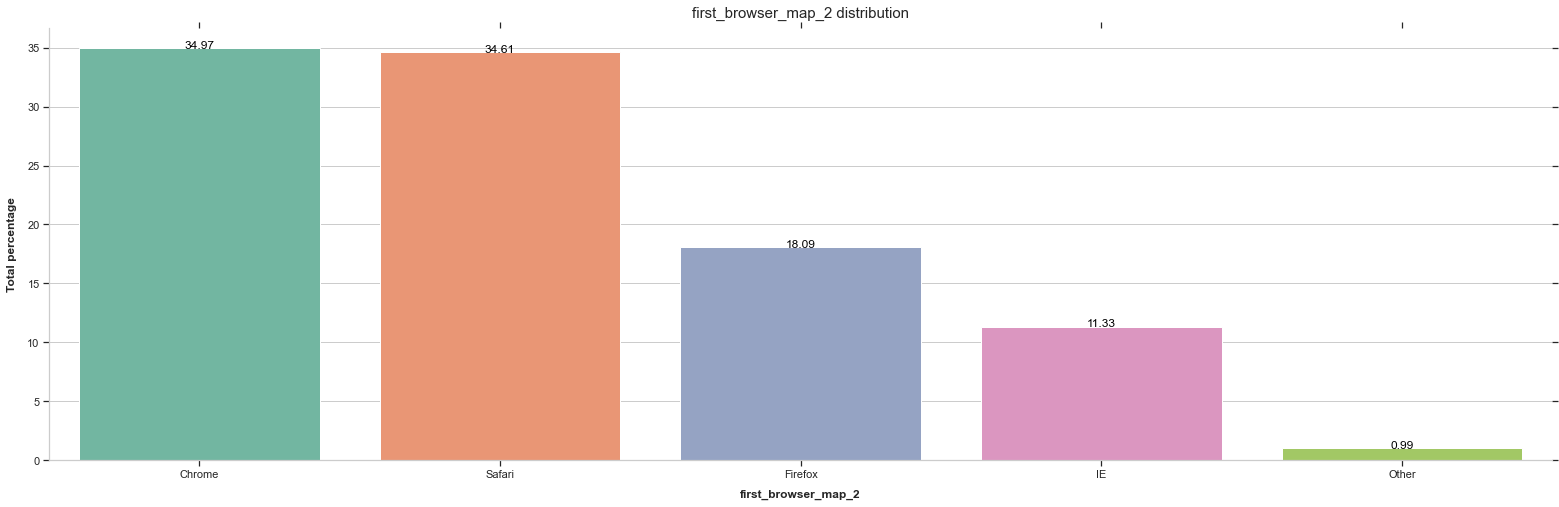

In [84]:
calculate_percentage("first_browser_map_2",True)

In [93]:
print(train_users_df["first_browser"].unique())
print(len(train_users_df["first_browser"].unique()))

print(train_users_df["first_browser_map_2"].unique())
print(len(train_users_df["first_browser_map_2"].unique()))

['Chrome' 'IE' 'Firefox' 'Safari' nan 'Mobile Safari' 'Chrome Mobile'
 'RockMelt' 'Chromium' 'Android Browser' 'AOL Explorer'
 'Palm Pre web browser' 'Mobile Firefox' 'Opera' 'TenFourFox' 'IE Mobile'
 'Apple Mail' 'Silk' 'Camino' 'Arora' 'BlackBerry Browser' 'SeaMonkey'
 'Iron' 'Sogou Explorer' 'IceWeasel' 'Opera Mini' 'SiteKiosk' 'Maxthon'
 'Kindle Browser' 'CoolNovo' 'Conkeror' 'wOSBrowser' 'Google Earth'
 'Crazy Browser' 'Mozilla' 'OmniWeb' 'PS Vita browser' 'NetNewsWire'
 'CometBird' 'Comodo Dragon' 'Flock' 'Pale Moon' 'Avant Browser'
 'Opera Mobile' 'Yandex.Browser' 'TheWorld Browser' 'SlimBrowser' 'Epic'
 'Stainless' 'Googlebot' 'Outlook 2007' 'IceDragon']
52
['Chrome' 'IE' 'Firefox' 'Safari' nan 'Other']
6


We have mapped the 52 original browsers to 6 (including nan) which will hopefully restrict overfitting and provide a more accurate model. Also, dramtically reduces the size of our one hot encoding input space as it will be much less dense.

Now move on to looking at device type.
Looking at the below distrubution we need to see if maybe Apple users book one destination as apposed to windows or android. Or do hand held and desktop users book diffrently?

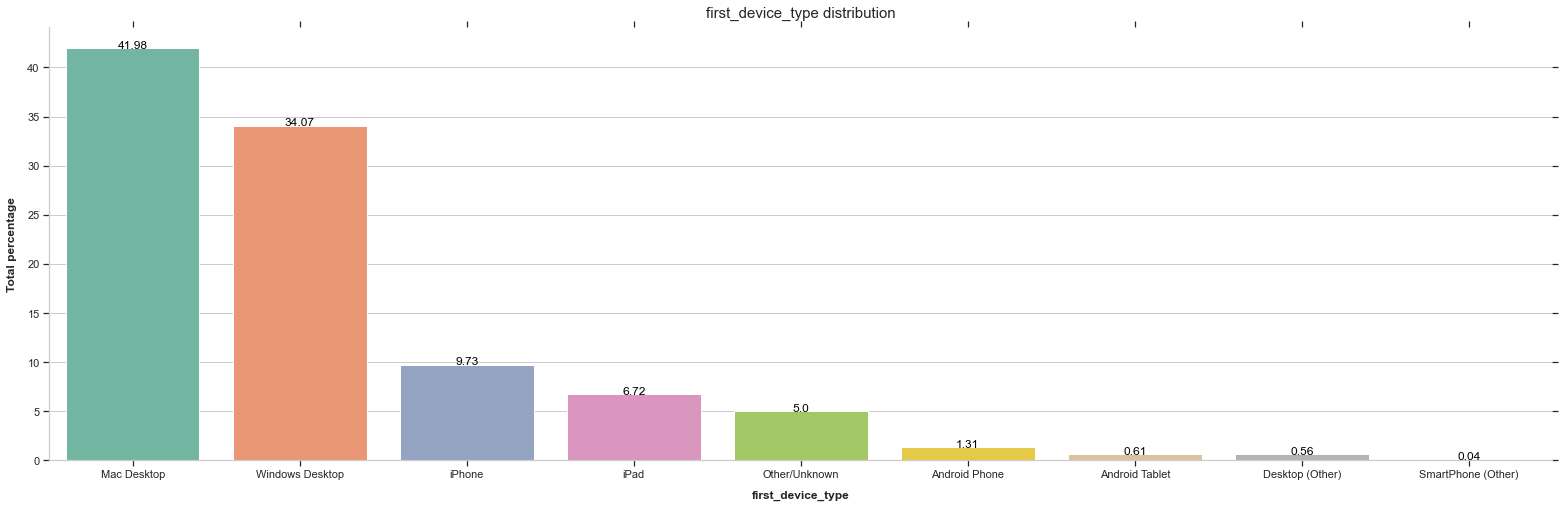

In [94]:
calculate_percentage(columns_of_interest[1],True)

In [98]:
manufacturer_map = {}
manufacturer_map["Mac Desktop"] = "Apple"
manufacturer_map["iPhone"] = "Apple"
manufacturer_map["iPad"] = "Apple"
manufacturer_map["Windows Desktop"] = "Windows"
manufacturer_map["Android Phone"] = "Android"
manufacturer_map["Android Tablet"] = "Android"
manufacturer_map["Other/Unknown"] = "Other"
manufacturer_map["Desktop (Other)"] = "Other"
manufacturer_map["SmartPhone (Other)"] = "Other"
train_users_df["Manufacturer"] = train_users_df["first_device_type"].map(manufacturer_map)

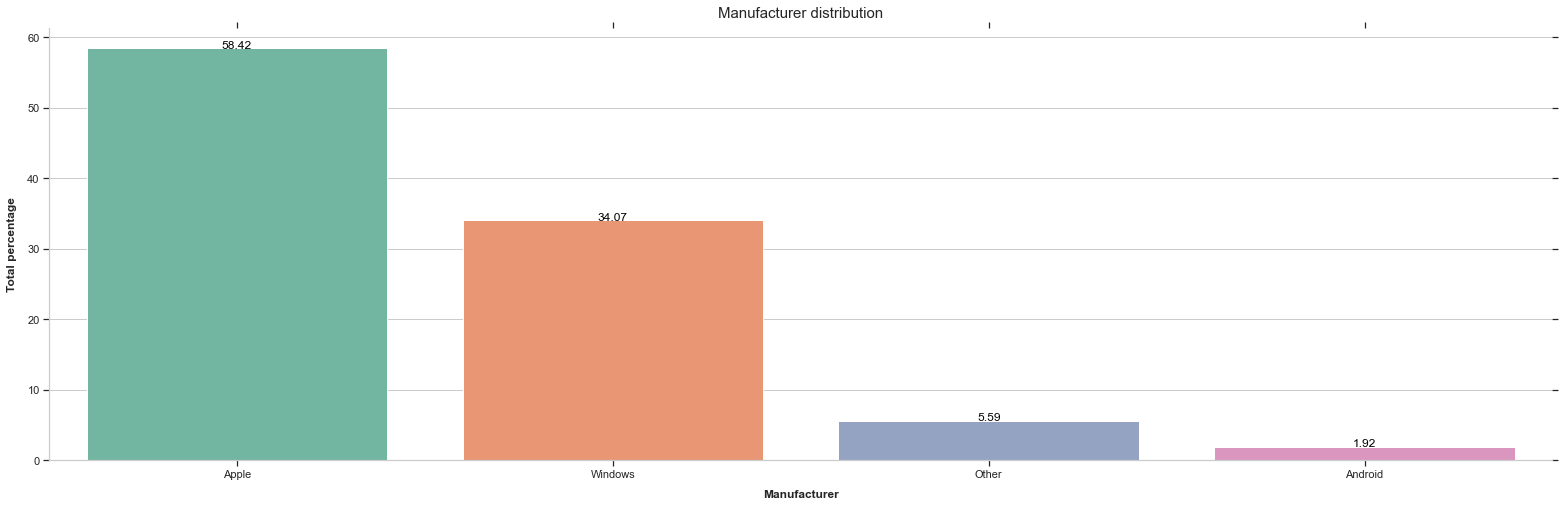

In [100]:
calculate_percentage("Manufacturer", True)

This will likely be a good dimension for our models and  does not increase complexity too much so will be used in models going forwards

In [101]:
hardware_map = {}
hardware_map["Mac Desktop"] = "Desktop"
hardware_map["iPhone"] = "Phone"
hardware_map["iPad"] = "Tablet"
hardware_map["Windows Desktop"] = "Desktop"
hardware_map["Android Phone"] = "Phone"
hardware_map["Android Tablet"] = "Tablet"
hardware_map["Other/Unknown"] = "Other"
hardware_map["Desktop (Other)"] = "Desktop"
hardware_map["SmartPhone (Other)"] = "Phone"
train_users_df["Hardware"] = train_users_df["first_device_type"].map(hardware_map)

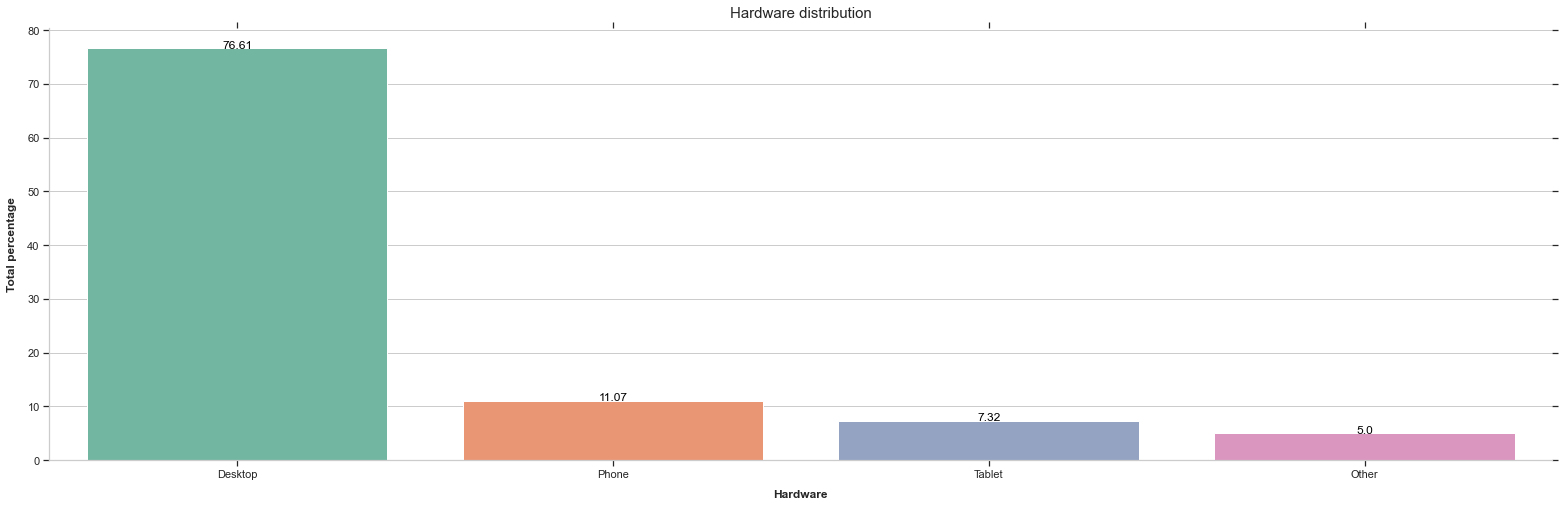

In [102]:
calculate_percentage("Hardware", True)

In [104]:
# Andrea's function
def countplot_bivariate(x_axis, hue, data):
    fig, ax = plt.subplots()
    fig.set_size_inches(23,8)
    fig.tight_layout(pad=5.0)

    g = sns.countplot(x=x_axis, hue=hue, data=data, palette="Set2")
    sns.despine()
    plt.legend(loc='upper right')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis="both", which="both", bottom="off", top="off",labelbottom="on", left="off", right="off", labelleft="on")

In [108]:
print(train_users_df.columns)

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'first_browser_map',
       'first_browser_map_2', 'Manufacturer', 'Hardware'],
      dtype='object')


In [109]:
train_users_df_no_ndf = train_users_df[train_users_df['country_destination'] != 'NDF']
train_users_df_no_ndf = train_users_df_no_ndf[train_users_df_no_ndf['country_destination'] != 'US']
train_users_df_no_ndf = train_users_df_no_ndf[train_users_df_no_ndf['language'] != 'en']

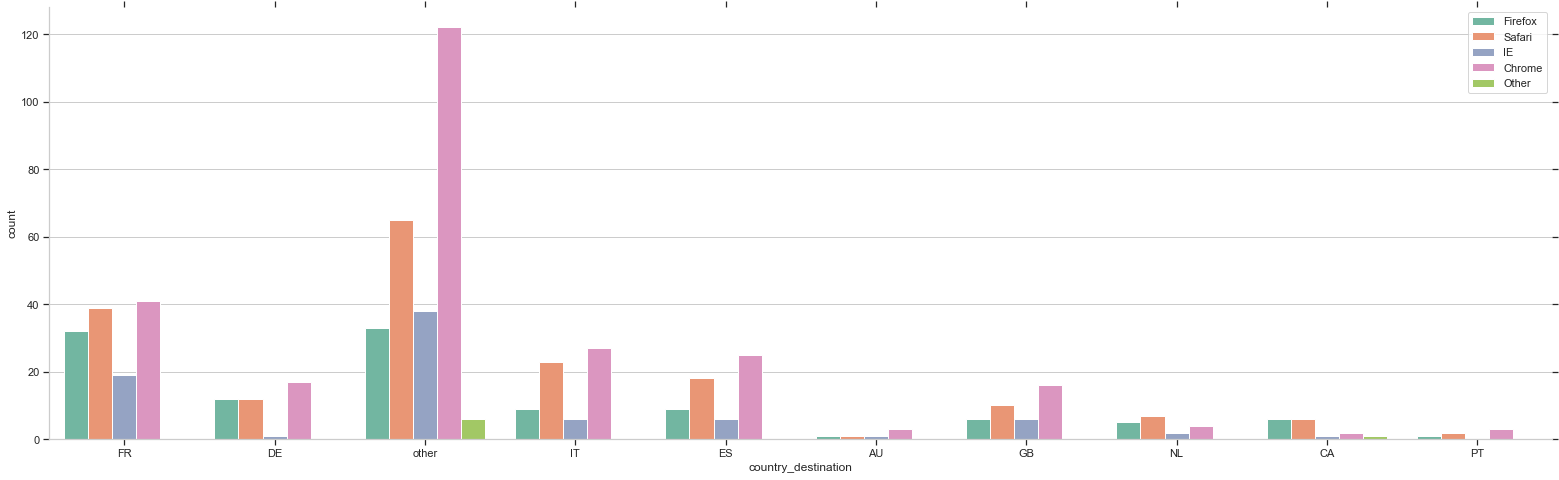

In [110]:
countplot_bivariate('country_destination','first_browser_map_2',train_users_df_no_ndf)

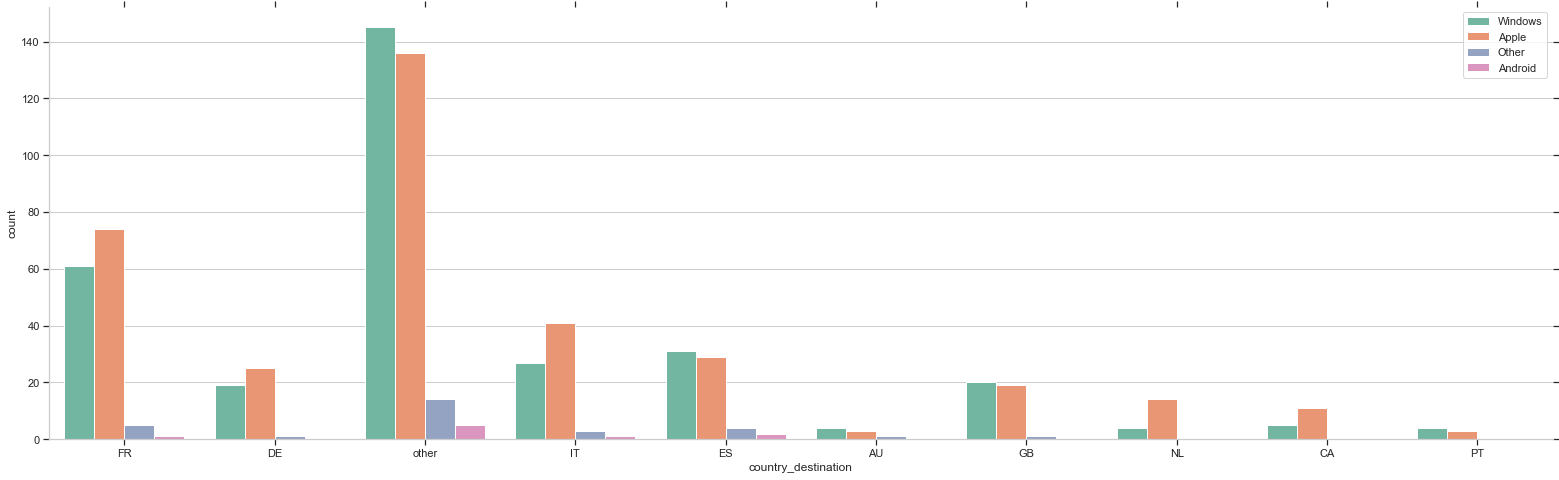

In [111]:
countplot_bivariate('country_destination','Manufacturer',train_users_df_no_ndf)

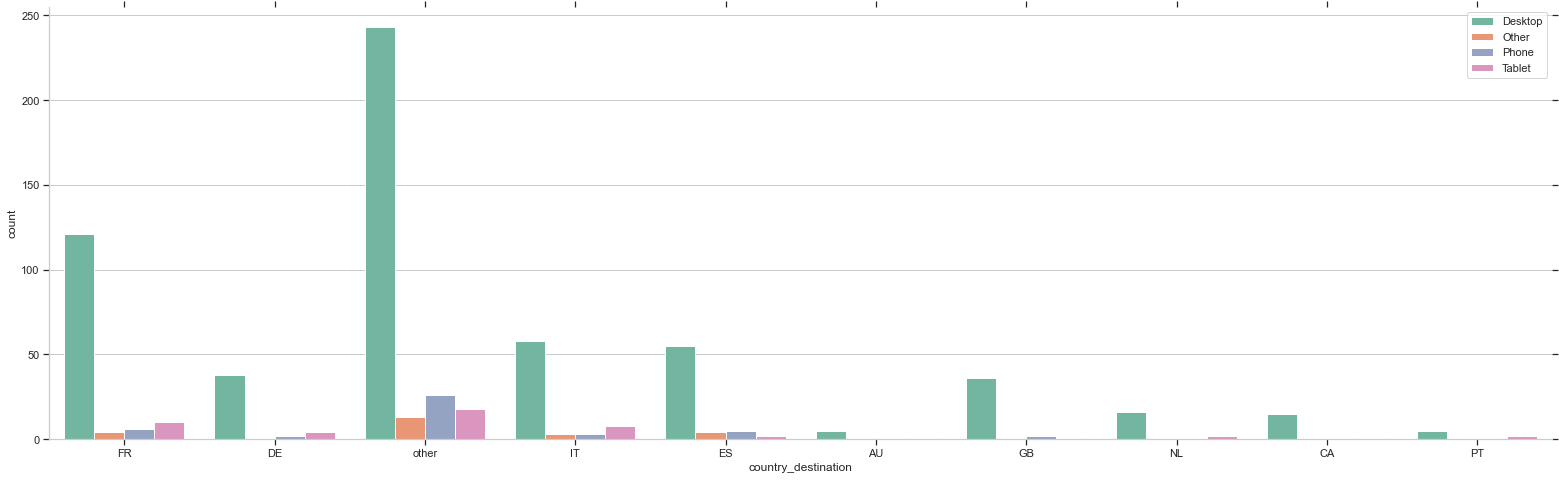

In [112]:
countplot_bivariate('country_destination','Hardware',train_users_df_no_ndf)